
# Diseño de software para cómputo científico

----

## Unidad 6: Interfaces de línea de comandos


## Referencias

- https://docs.python.org/3/library/argparse.html
- https://es.slideshare.net/tisto/argparse-python-command-line-parser
- https://en.wikipedia.org/wiki/Command-line_interface


## Estandar posix

```bash 
$ ejecutable subcomando -or --opcion -k foo
```

- En sistemas tipo Unix, el guión comienza las opciones-
- La convencion **GNU** es usar dos guiones y luego una palabra (por ejemplo, `--crear`) para identificar el uso de la opción
- Mientras que la convención anterior (y aún disponible como una opción para las opciones de uso frecuente) es usar *un guión* y luego una letra (por ejemplo, `-c`).
- Si un guión va seguido de dos o más letras, puede significar que se están especificando dos opciones (`-or`), o puede significar que la segunda letra y las siguientes son un parámetro (como nombre de archivo o fecha) para la primera opción.
- Un doble-guión se usan para "opciones largas" donde se usan nombres de opciones más descriptivos. 
- Esta es una característica común del software GNU.

## `argparse`: analizador de opciones de línea de comandos, argumentos y subcomandos

```bash
python foo.py -a 1 --foo
```

- Los parámetros de un comando de python estan en `sys.argv`

    ```python
    >>> import sys
    >>> sys.argv
    ["foo.py", "-a", "1", "--foo"]
    ```
- El módulo `argparse` facilita la escritura de interfaces de línea de comandos. 
- El programa define qué argumentos requiere, y argparse descubrirá cómo analizarlos desde `sys.argv`. 
- El módulo argparse también genera automáticamente mensajes de ayuda y emite errores cuando los usuarios le dan argumentos inválidos al programa.
    
    

## `argparse`: analizador de opciones de línea de comandos, argumentos y subcomandos

```python
# prog.py
import argparse

parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('integers', metavar='N', type=int, nargs='+',
                    help='an integer for the accumulator')
parser.add_argument('--sum', dest='accumulate', action='store_const',
                    const=sum, default=max,
                    help='sum the integers (default: find the max)')

args = parser.parse_args()
print(args.accumulate(args.integers))
```

## `argparse`

```bash
$ python prog.py -h
usage: prog.py [-h] [--sum] N [N ...]

Process some integers.

positional arguments:
 N           an integer for the accumulator

optional arguments:
 -h, --help  show this help message and exit
 --sum       sum the integers (default: find the max)
```

## `argparse`

```bash
$ python prog.py 1 4 3 2
4

$ python prog.py 1 4 3 2 --sum
10
```

## `argparse`

```bash
$ python prog.py a b c
usage: prog.py [-h] [--sum] N [N ...]
prog.py: error: argument N: invalid int value: 'a'
```

## Clase `argparse.ArgumentParser`

Soporta, entre otros, los siguientes parámetros los cuales deben pasarse como keywords:

- `prog` - El nombre del programa (default: sys.argv[0])
- `usage` - Como usar el programa (default: generated from arguments added to parser)
- `description` - Texto previo a la descripción de las ayudas (default: none)
- `epilog` - Texto posterior a las ayudas (default: none)


## `ArgumentParser.add_argument()`


- `name` or `flags` - Ya sea un nombre o una lista de cadenas de opciones(`-f`, `--foo`).
- `action` - Qué hacer con el parámetro (siguiente slide).
- `nargs` - Número de argumentos que tienen que ser consumidos por el parámetro.
- `const` - Una constante (aveces esto es requerido)
- `default` - Valor por defecto si no es provisto ninguno.
- `type` - Tipo de dato.
- `choices` - Valores aceptados por el argumento.
- `required` - Si es o no requerido (por defecto es `False`)
- `help` - Una breve descripción de lo que hace el argumento.
- `metavar` - Un nombre para el argumento en los mensajes de uso.
- `dest` - El nombre del atributo que se agregará al objeto devuelto por `parse_args()`.

### `ArgumentParser.add_argument()` -- name or flags

In [ ]:
import argparse

parser = argparse.ArgumentParser(prog='PROG')
parser.add_argument('-f', '--foo', dest="valor_de_foo")
parser.add_argument('bar')

namespace = parser.parse_args(["-f", "hola", "kjkj"])
namespace

### `ArgumentParser.add_argument()` -- action 

#### `store`

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--foo', action="store")

parser.parse_args(['--foo', '1'])

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--foo', action='store_const', const=42)

parser.parse_args(['--foo'])

### `ArgumentParser.add_argument()` -- action 

#### `store_true` and `store_false`

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--foo', action='store_true')  # si se recibe, almacena True, sino lo contrario
parser.add_argument('--bar', action='store_false') # si se recibe, almacena False, sino lo contrario
parser.add_argument('--baz', action='store_false') # si se recibe, almacena False, sino lo contrario

parser.parse_args(['--foo', '--bar']) 

####  `append`

In [ ]:
import numpy as np
parser = argparse.ArgumentParser()
parser.add_argument('--foo', action='append', type=float)

num = parser.parse_args('--foo 1 --foo 2'.split())
np.array(num.foo)

### `ArgumentParser.add_argument()` -- action 

#### `append_const`

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--str', dest='types', action='append_const', const=str)
parser.add_argument('--int', dest='types', action='append_const', const=int)

parser.parse_args('--str --int'.split())

####  `count`

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--verbose', '-v', action='count')
parser.parse_args(['-vvv'])

### `ArgumentParser.add_argument()` -- type

- Por defecto, los objetos ArgumentParser leen los argumentos de la línea de comandos como `str`. 
- Sin embargo, con bastante frecuencia, la cadena de línea de comandos debe interpretarse como otro tipo, como float o int.

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('foo', type=int)
parser.add_argument('bar', type=float)
parser.parse_args('2 35.58'.split())

Para facilitar el uso de varios tipos de archivos, el módulo argparse proporciona el FileType

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('bar', type=argparse.FileType('w'))

parser.parse_args(['out.txt'])

## Subcomandos

- Muchos programas dividen su funcionalidad en varios subcomandos, por ejemplo, el programa **git** puede invocar subcomandos como `git push`, `git commit` o `git pull`
- Dividir la funcionalidad de esta manera puede ser una idea particularmente buena cuando un programa realiza varias funciones diferentes que requieren diferentes tipos de argumentos de línea de comandos.

In [ ]:
# create the top-level parser
parser = argparse.ArgumentParser(prog='PROG')
parser.add_argument('--foo', action='store_true', help='foo help')

subparsers = parser.add_subparsers(help='sub-command help')

# create the parser for the "clone" command
parser_clone = subparsers.add_parser('clone', help='clone help')
parser_clone.add_argument('bar', type=int, help='bar help')

# create the parser for the "commit" command
parser_commit = subparsers.add_parser('commit', help='commit help')
parser_commit.add_argument('--baz', choices='XYZ', help='baz help');

In [ ]:
parser.parse_args(['clone', '12'])

In [ ]:
parser.parse_args(['--foo', 'commit', '--baz', 'Z'])

# Typer: Simplifica el desarrollo de una CLI
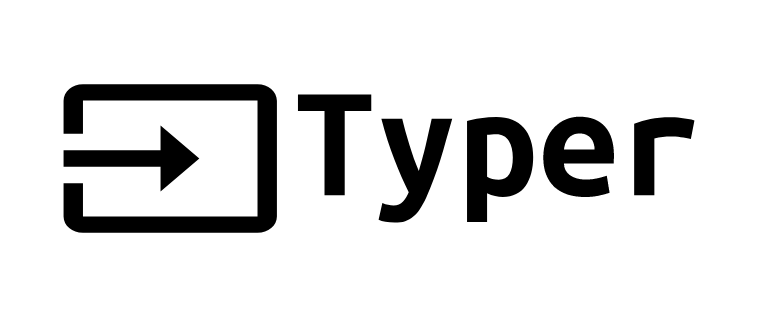

Referencia: https://pythonrepo.com/repo/tiangolo-typer-python-command-line-interface-development

In [ ]:
!pip install typer

## Typer: Ejemplo mínimo
Aprovecha la notación de tipos de python para construir los argumentos.

```python
# main.py
import typer

def main(name: str):
    typer.echo(f"Hello {name}")

if __name__ == "__main__":
    typer.run(main)
```

In [ ]:
!python cli/main.py --help

## Typer: Ejemplo con comandos
Veamos un ejemplo más interesante con subcomandos
```python
# main2.py
import typer

app = typer.Typer()

@app.command()
def hello(name: str):
    typer.echo(f"Hello {name}")

@app.command()
def goodbye(name: str, formal: bool = False):
    if formal:
        typer.echo(f"Goodbye Ms. {name}. Have a good day.")
    else:
        typer.echo(f"Bye {name}!")

if __name__ == "__main__":
    app()
```

In [ ]:
!python cli/main2.py --help

## Typer: Ejemplo IRL

Carpyncho ofrece una CLI basada en `typer`: 
https://github.com/carpyncho/carpyncho-py/blob/master/carpyncho.py

In [ ]:
!carpyncho --help